In [10]:
import pickle
import seaborn as sn
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
with open('./train/ppo2_1_raw_data_disc_0_by_polina_training_11Dec_14:53.pickle', 'rb') as f:
    data = pickle.load(f)

In [19]:
data.keys()
df = pd.DataFrame(data, index=range(len(data['timestep'])))

dict_keys(['success', 'timestep', 'time_exceeded'])

In [21]:
df[df['time_exceeded'] == 1]

,success,timestep,time_exceeded
24,0,3557,1
29,0,4162,1
30,0,4305,1
35,0,5074,1
50,0,6259,1
53,0,6449,1
54,0,6508,1
55,0,6533,1
62,0,7596,1
78,0,9060,1


In [7]:
def calc_success_rate(df, i_step):
    df_cutted = df.iloc[:i_step + 1]
    return (len(df_cutted[df_cutted['success'] == 1]) - len(df_cutted[df_cutted['success'] != 1])) / (len(df_cutted[df_cutted['success'] == 1]) + len(df_cutted[df_cutted['success'] != 1]))

In [22]:
def calc_timeexceeded_rate(df, i_step):
    df_cutted = df.iloc[:i_step + 1]
    return (len(df_cutted[df_cutted['time_exceeded'] == 0]) - len(df_cutted[df_cutted['time_exceeded'] == 1])) / (len(df_cutted[df_cutted['time_exceeded'] == 0]) + len(df_cutted[df_cutted['time_exceeded'] == 1]))

In [23]:
df['success_rate'] = 1
df['time_exceeded_rate'] = 1
for i in range(len(df['timestep'])):
    df.loc[i, 'success_rate'] = calc_success_rate(df, i)
    df.loc[i, 'time_exceeded_rate'] = calc_timeexceeded_rate(df, i)
df

,success,timestep,time_exceeded,success_rate,time_exceeded_rate
0,-1,24,0,-1,1.000000
1,-1,368,0,-1,1.000000
2,-1,463,0,-1,1.000000
3,-1,466,0,-1,1.000000
4,-1,920,0,-1,1.000000
...,...,...,...,...,...
80,-1,9265,0,-1,0.753086
81,-1,9315,0,-1,0.756098
82,0,9333,1,-1,0.734940
83,-1,9419,0,-1,0.738095


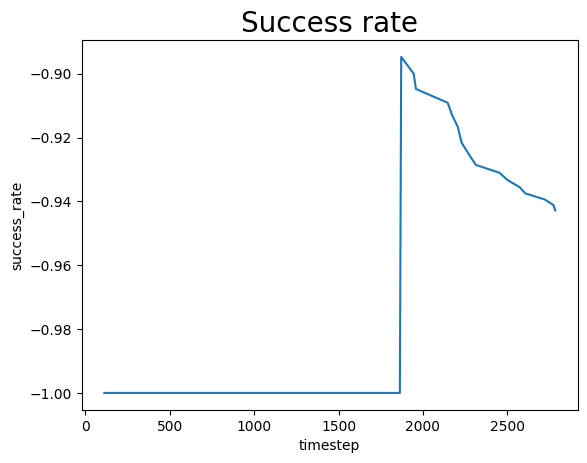

In [102]:
sn.lineplot(
    x='timestep', 
    y='success_rate', 
    # errorbar='sd',
    data=df, 
    # kind='line',
    # err_style="band"
    )
plt.title('Success rate', size=20, color='black')
plt.show()
plt.close();

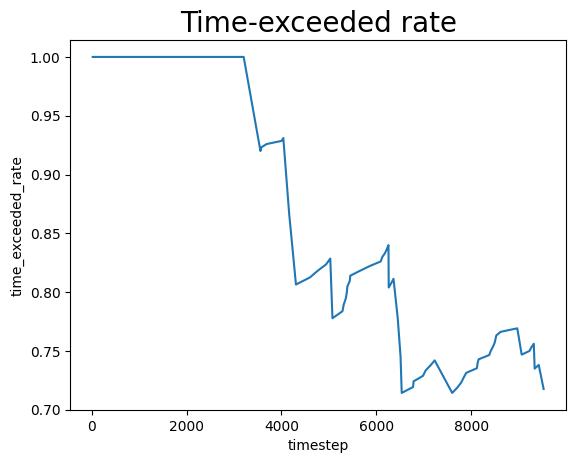

In [24]:
sn.lineplot(
    x='timestep', 
    y='time_exceeded_rate', 
    # errorbar='sd',
    data=df, 
    # kind='line',
    # err_style="band"
    )
plt.title('Time-exceeded rate', size=20, color='black')
plt.show()
plt.close();